## Lesson-01

In [61]:
from sklearn.datasets import load_boston

In [62]:
data = load_boston()

In [66]:
import pandas as pd

In [67]:
dataframe = pd.DataFrame(data['data'])

In [69]:
dataframe.columns = data['feature_names']

In [71]:
dataframe['price'] = data['target']

In [74]:
import seaborn as sns

In [77]:
%matplotlib inline

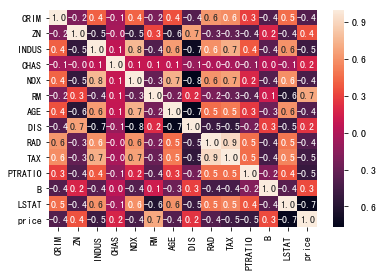

In [78]:
sns.heatmap(dataframe.corr(), annot=True, fmt='.1f')

In [81]:
import matplotlib.pyplot as plt

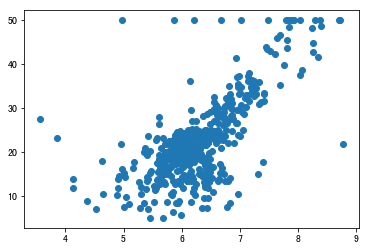

In [83]:
plt.scatter(dataframe['RM'], dataframe['price'])

In [84]:
x = dataframe['RM']

In [85]:
y = dataframe['price']

In [86]:
history_notes = {_x : _y for _x, _y in zip(x, y)}

In [98]:
history_notes[6.57]

KeyError: 6.57

In [101]:
similary_ys = [y for _, y in sorted(history_notes.items(), key=lambda x_y: (x_y[0] - 6.57) ** 2)[:3]]

In [105]:
import numpy as np

In [106]:
np.mean(similary_ys)

24.2

## 用历史数据来预测未曾见到的过的数据，最直接的方法

## K-Neighbor-Nearst

In [112]:
def knn(query_x, history, top_n=3):
    sorted_notes = sorted(history.items(), key=lambda x_y: (x_y[0] - query_x) ** 2) 
    similar_notes = sorted_notes[:top_n]
    similar_ys = [y for _, y in similar_notes]
    
    return np.mean(similar_ys)

In [113]:
knn(5.4, history_notes)

15.700000000000001

## 为了更快的获得结果，我们希望通过拟合函数来获得预测能力

$$ f(rm) = k * rm + b $$ 

## Random Approach

$$ Loss(k, b) = \frac{1}{n} \sum_{i \in N} (\hat{y_i} - y_i) ^ 2 $$
$$ Loss(k, b) = \frac{1}{n} \sum_{i \in N} ((k * rm_i + b) - y_i) ^ 2 $$

In [114]:
def loss(y_hat, y):
    return np.mean((y_hat - y) ** 2)

In [115]:
import random

In [183]:
min_loss = float('inf')
best_k, bes_b = None, None

for step in range(1000):
    min_v, max_v = -100, 100
    k, b = random.randrange(min_v, max_v), random.randrange(min_v, max_v)
    y_hats = [k * rm_i  + b for rm_i in x]
    current_loss = loss(y_hats, y)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
        print('在第{}步，我们获得了函数 f(rm) = {} * rm + {}, 此时loss是: {}'.format(step, k, b, current_loss))

在第0步，我们获得了函数 f(rm) = 8 * rm + -81, 此时loss是: 2880.371909501975
在第7步，我们获得了函数 f(rm) = -18 * rm + 92, 此时loss是: 2311.363173177864
在第9步，我们获得了函数 f(rm) = -17 * rm + 92, 此时loss是: 1775.9195094525674
在第11步，我们获得了函数 f(rm) = 1 * rm + 9, 此时loss是: 128.4791166936759
在第37步，我们获得了函数 f(rm) = 10 * rm + -47, 此时loss是: 88.7065468379447
在第439步，我们获得了函数 f(rm) = 10 * rm + -45, 此时loss是: 65.96069703557316


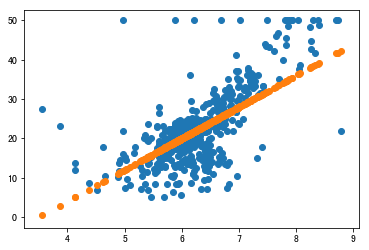

In [182]:
plt.scatter(x, y)
plt.scatter(x, [best_k * rm + best_b for rm in x])

## 蒙特卡洛模拟

## Supervisor

$$ Loss(k, b) = \frac{1}{n} \sum_{i \in N} ((k * rm_i + b) - y_i) ^ 2 $$

$$ \frac{\partial{loss(k, b)}}{\partial{k}} = \frac{2}{n}\sum_{i \in N}(k * rm_i + b - y_i) * rm_i $$

$$ \frac{\partial{loss(k, b)}}{\partial{b}} = \frac{2}{n}\sum_{i \in N}(k * rm_i + b - y_i)$$

In [244]:
def partial_k(k, b, x, y):
    return 2 * np.mean((k * x + b - y) * x)

def partial_b(k, b, x, y):
    return 2 * np.mean(k * x + b - y)

k, b = random.random(), random.random()
min_loss = float('inf')
best_k, bes_b = None, None
learning_rate = 1e-2

for step in range(2000):
    k, b = k + (-1 * partial_k(k, b, x, y) * learning_rate), b + (-1 * partial_b(k, b, x, y) * learning_rate)
    y_hats = k * x + b
    current_loss = loss(y_hats, y)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
        print('在第{}步，我们获得了函数 f(rm) = {} * rm + {}, 此时loss是: {}'.format(step, k, b, current_loss))

在第0步，我们获得了函数 f(rm) = 2.9196595763315556 * rm + 0.6848482043054139, 此时loss是: 74.675440772023
在第1步，我们获得了函数 f(rm) = 3.420375174909754 * rm + 0.7548275072460348, 此时loss是: 59.58540822228427
在第2步，我们获得了函数 f(rm) = 3.511829314750019 * rm + 0.7604709347456836, 此时loss是: 59.08682155970773
在第3步，我们获得了函数 f(rm) = 3.529430331340193 * rm + 0.7545063770532233, 此时loss是: 59.063388936034755
在第4步，我们获得了函数 f(rm) = 3.5337039939040835 * rm + 0.7464487914323131, 此时loss是: 59.05543251781335
在第5步，我们获得了函数 f(rm) = 3.535572418471553 * rm + 0.7380151893896418, 此时loss是: 59.047983520353874
在第6步，我们获得了函数 f(rm) = 3.5370065444168164 * rm + 0.7295154120820861, 此时loss是: 59.04055450389177
在第7步，我们获得了函数 f(rm) = 3.538362035658303 * rm + 0.7210053711760536, 此时loss是: 59.03312959395191
在第8步，我们获得了函数 f(rm) = 3.539703073229173 * rm + 0.7124951557507817, 此时loss是: 59.02570827194151
在第9步，我们获得了函数 f(rm) = 3.5410412389157377 * rm + 0.7039865860173629, 此时loss是: 59.018290519312586
在第10步，我们获得了函数 f(rm) = 3.5423786227608387 * rm + 0.695479990036817

In [246]:
best_k, best_b

(5.656182662843543, -12.750676812837026)

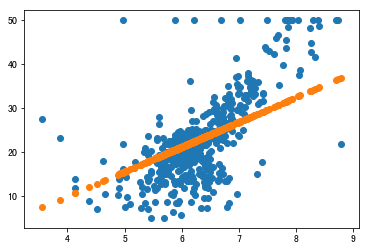

In [247]:
plt.scatter(x, y)
plt.scatter(x, [best_k * rm + best_b for rm in x])

## Supervised Learning

## 我们把房价的预测 变成更加负责，精细的模型，该怎么做？

$$ f(x) = k * x + b $$

$$ f(x) = k2 * \sigma(k_1 * x + b_1) + b2 $$

$$ \sigma(x) = \frac{1}{1 + e^(-x)} $$ 

In [252]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

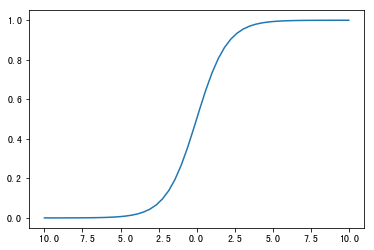

In [253]:
sub_x = np.linspace(-10, 10)
plt.plot(sub_x, sigmoid(sub_x))

In [261]:
def random_linear(x):
    k, b = random.random(), random.random()
    return k * x + b

In [271]:
def complex_function(x):
    return (random_linear(x))

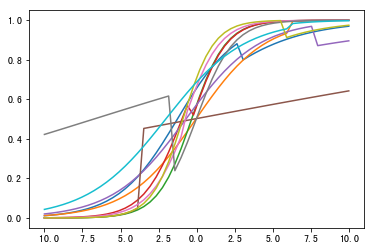

In [276]:
for _ in range(10):
    index = random.randrange(0, len(sub_x))
    sub_x_1, sub_x_2 = sub_x[:index], sub_x[index:]
    new_y = np.concatenate((complex_function(sub_x_1), complex_function(sub_x_2)))
    plt.plot(sub_x, new_y)

## 我们可以通过简单的、基本的模块，经过反复的叠加，来实现更加复杂的函数

## 面向越来越越复杂的函数？计算机如何求导？

## 1. 什么是机器学习？
## 2. KNN这种方法的缺陷，提出线性拟合的背景是什么
## 3. 怎么样通过监督的方法，来获得更快的函数权值更新
## 4. 非线性函数和线性函数的结合，可以拟合出非常复杂的函数
## 5. 深度学习我们可以通过基本的函数模块，来拟合更加复杂的函数

## Assigment:

$$ L2-Loss(y, \hat{y}) = \frac{1}{n}\sum{(\hat{y} - y)}^2 $$
$$ L1-Loss(y, \hat{y}) = \frac{1}{n}\sum{|(\hat{y} - y)|} $$


## 将课堂代码中的L2-Loss 变成L1Loss 并且实现梯度下降